# Predicting Credit Card Default

### Section I - Obtaining & Understand the dataset 

In [1]:
#importing packages and basic libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("default.xls")
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 30000 rows and 25 columns.


In [3]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, :].describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,3.000e+04,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,...,43262.949,40311.401,38871.760,5663.581,5.921e+03,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,...,64332.856,60797.156,59554.108,16563.280,2.304e+04,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000e+00,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,8.330e+02,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2.009e+03,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5.000e+03,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1.684e+06,896040.000,621000.000,426529.000,528666.000,1.000


In [4]:
#list of Xs
Xs = list(df.columns)
#remove ID and default, which are not Xs
Xs = list(filter(lambda a: a!='ID' and a!='default', Xs))

#Split Numerical and Categorical Variables
Xs_Cat = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
Xs_Num = list(np.setdiff1d(Xs,Xs_Cat))
print(Xs_Cat)
print(Xs_Num)

['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


Default Class Summary






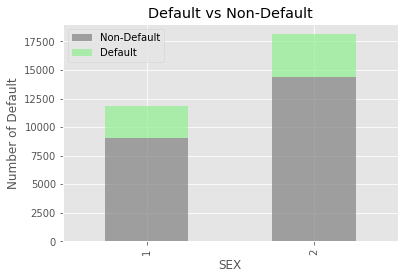

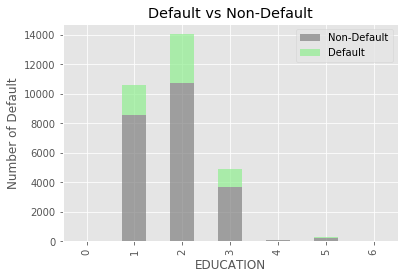

In [5]:
# Passenger class summary
print('Default Class Summary')

print('\n')
#print(df.groupby(['SEX','default']).SEX.count().unstack())

# Passenger class visualization
SEX = df.groupby(['SEX','default']).SEX.count().unstack()
p1 = SEX.plot(kind = 'bar', stacked = True, 
                   title = 'Default vs Non-Default', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('SEX')
p1.set_ylabel('Number of Default')
p1.legend(['Non-Default','Default'])
#plt.show()

print('\n')
#print(df.groupby(['SEX','default']).SEX.count().unstack())

# Passenger class visualization
EDUCATION = df.groupby(['EDUCATION','default']).EDUCATION.count().unstack()
p2 = EDUCATION.plot(kind = 'bar', stacked = True, 
                   title = 'Default vs Non-Default', 
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_xlabel('EDUCATION')
p2.set_ylabel('Number of Default')
p2.legend(['Non-Default','Default'])
plt.show()

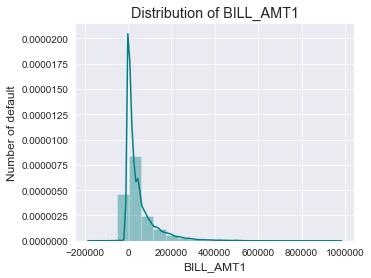

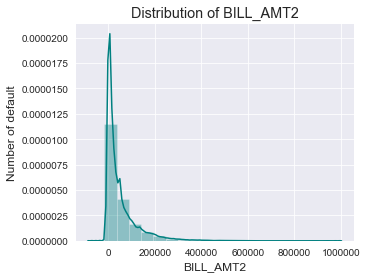

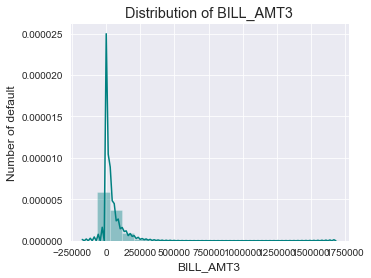

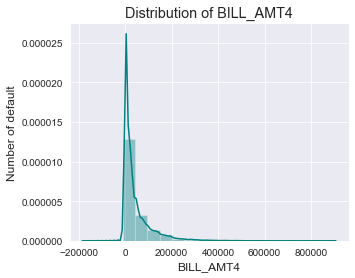

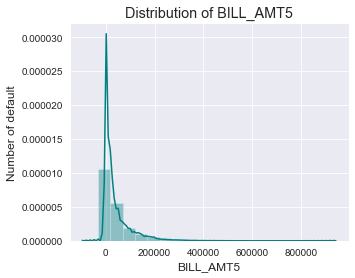

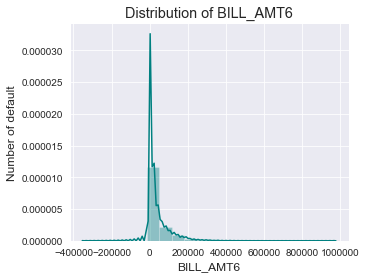

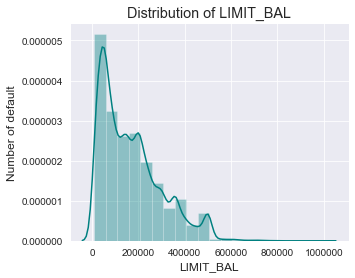

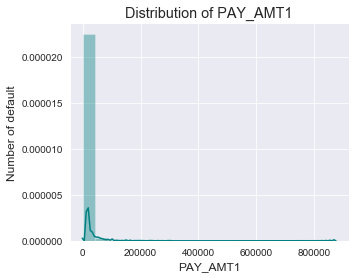

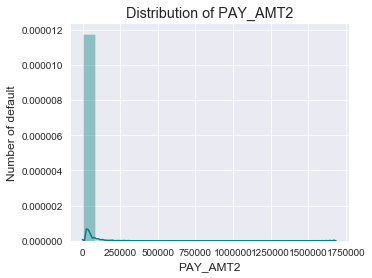

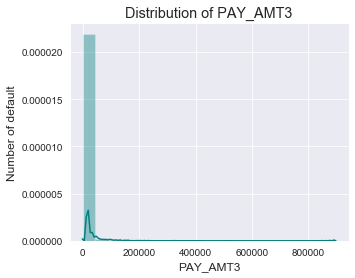

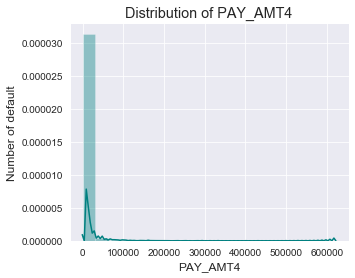

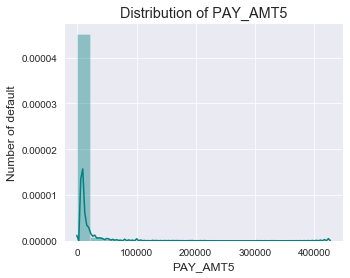

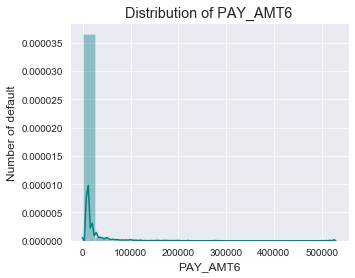

In [7]:
#visualizations of Xs - Numerical Vars

for x in Xs_Num:
    plt.figure(figsize=(5,4))
    plt.title('Distribution of ' + x)
    plt.xlabel(x)
    plt.ylabel('Number of default')
    sns.distplot(df[x],color = 'teal', bins=20, rug = False, hist=True) 

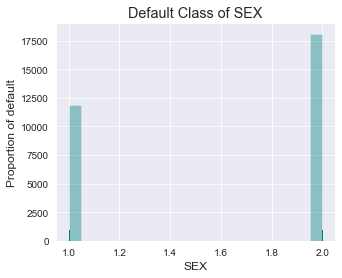

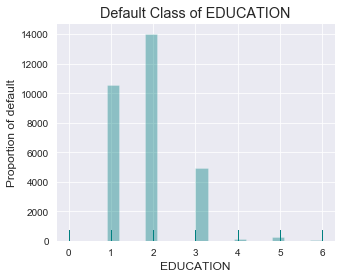

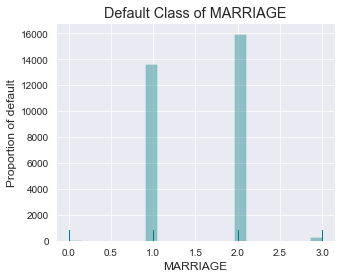

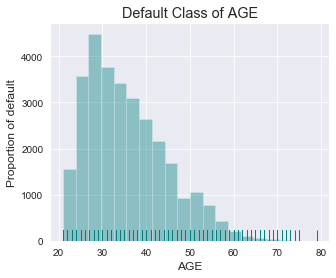

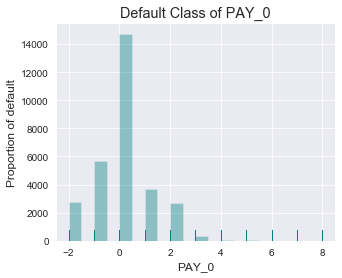

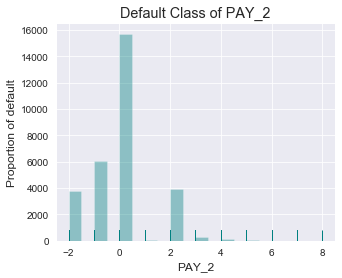

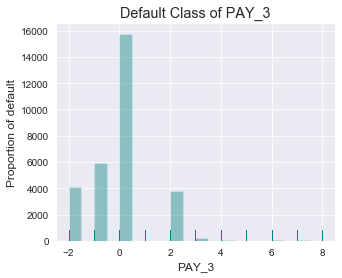

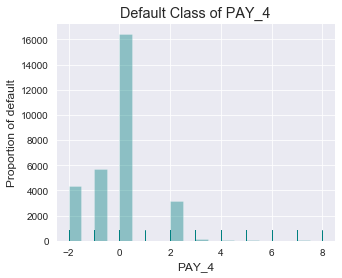

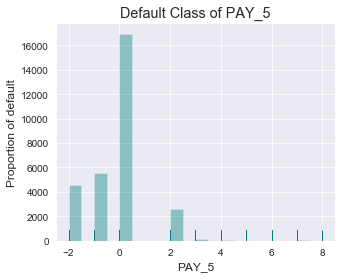

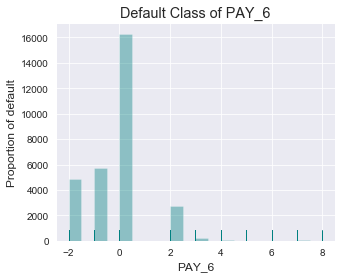

In [8]:
#visualizations of Xs - Categorical Vars
for x in Xs_Cat:
    plt.figure(figsize=(5,4))
    plt.title('Default Class of ' + x)
    plt.xlabel(x)
    plt.ylabel('Proportion of default')
    sns.distplot(df[x], kde=False, rug=True, color = 'teal', bins=20, hist=True) 
    plt.savefig(x +'.png')

In [9]:
#default vs. normal transactions 
counts = df.default.value_counts()
normal = counts[0]
default = counts[1]
perc_normal = (normal/(normal+default))*100
perc_default = (default/(normal+default))*100
print('There were {} non-default transactions ({:.3f}%) and {} default transactions ({:.3f}%).'.format(normal, perc_normal, default, perc_default))


There were 23364 non-default transactions (77.880%) and 6636 default transactions (22.120%).


Text(0.5, 0, 'Class (0:Non-Default, 1:Default)')

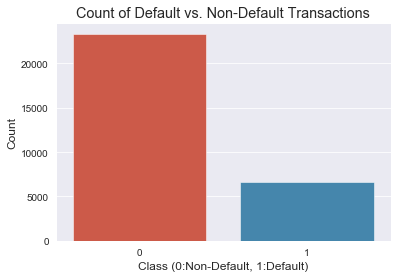

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Default vs. Non-Default Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Default, 1:Default)')

**Scaling Amount**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# from imblearn.over_sampling import SMOTE

for x in Xs_Num:
    scaled_amount = scaler.fit_transform(df[[x]])
    flat_list = [item for sublist in scaled_amount.tolist() for item in sublist]
    scaled_amount = pd.Series(flat_list)
    #concatenating newly created columns w original df
    df = pd.concat([df, scaled_amount.rename('scaled_'+ x)], axis=1)

In [12]:
#dropping old amount and time columns
df.drop(Xs_Num, axis=1, inplace=True)

In [13]:
#negative correlations smaller than -0.1
#correlation threshold is low here due to the limitation of data (independent vars have low predictive power)
# Calculate correlation
corr = df.corr()
corr[corr.default < -0.1]

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,scaled_BILL_AMT4,scaled_BILL_AMT5,scaled_BILL_AMT6,scaled_LIMIT_BAL,scaled_PAY_AMT1,scaled_PAY_AMT2,scaled_PAY_AMT3,scaled_PAY_AMT4,scaled_PAY_AMT5,scaled_PAY_AMT6
scaled_LIMIT_BAL,0.026,0.025,-0.219,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,...,0.294,0.296,0.29,1.0,0.195,0.178,0.21,0.203,0.217,0.22


In [14]:
# positive correlations greater than 0.1
# correlation threshold is low here due to the limitation of data (independent vars have low predictive power)
corr[corr.default > 0.1]

,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,scaled_BILL_AMT4,scaled_BILL_AMT5,scaled_BILL_AMT6,scaled_LIMIT_BAL,scaled_PAY_AMT1,scaled_PAY_AMT2,scaled_PAY_AMT3,scaled_PAY_AMT4,scaled_PAY_AMT5,scaled_PAY_AMT6
PAY_0,-0.031,-0.058,0.105,0.020,-0.039,1.000,0.672,0.574,0.539,0.509,...,0.179,0.181,0.177,-0.271,-0.079,-0.070,-0.071,-0.064,-0.058,-0.059
PAY_2,-0.011,-0.071,0.122,0.024,-0.050,0.672,1.000,0.767,0.662,0.623,...,0.222,0.221,0.219,-0.296,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037
PAY_3,-0.018,-0.066,0.114,0.033,-0.053,0.574,0.767,1.000,0.777,0.687,...,0.227,0.225,0.222,-0.286,0.001,-0.067,-0.053,-0.046,-0.036,-0.036
PAY_4,-0.003,-0.060,0.109,0.033,-0.050,0.539,0.662,0.777,1.000,0.820,...,0.246,0.243,0.239,-0.267,-0.009,-0.002,-0.069,-0.043,-0.034,-0.027
PAY_5,-0.022,-0.055,0.098,0.036,-0.054,0.509,0.623,0.687,0.820,1.000,...,0.272,0.270,0.263,-0.249,-0.006,-0.003,0.009,-0.058,-0.033,-0.023
PAY_6,-0.020,-0.044,0.082,0.034,-0.049,0.475,0.576,0.633,0.716,0.817,...,0.266,0.291,0.285,-0.235,-0.001,-0.005,0.006,0.019,-0.046,-0.025
default,-0.014,-0.040,0.028,-0.024,0.014,0.325,0.264,0.235,0.217,0.204,...,-0.010,-0.007,-0.005,-0.154,-0.073,-0.059,-0.056,-0.057,-0.055,-0.053


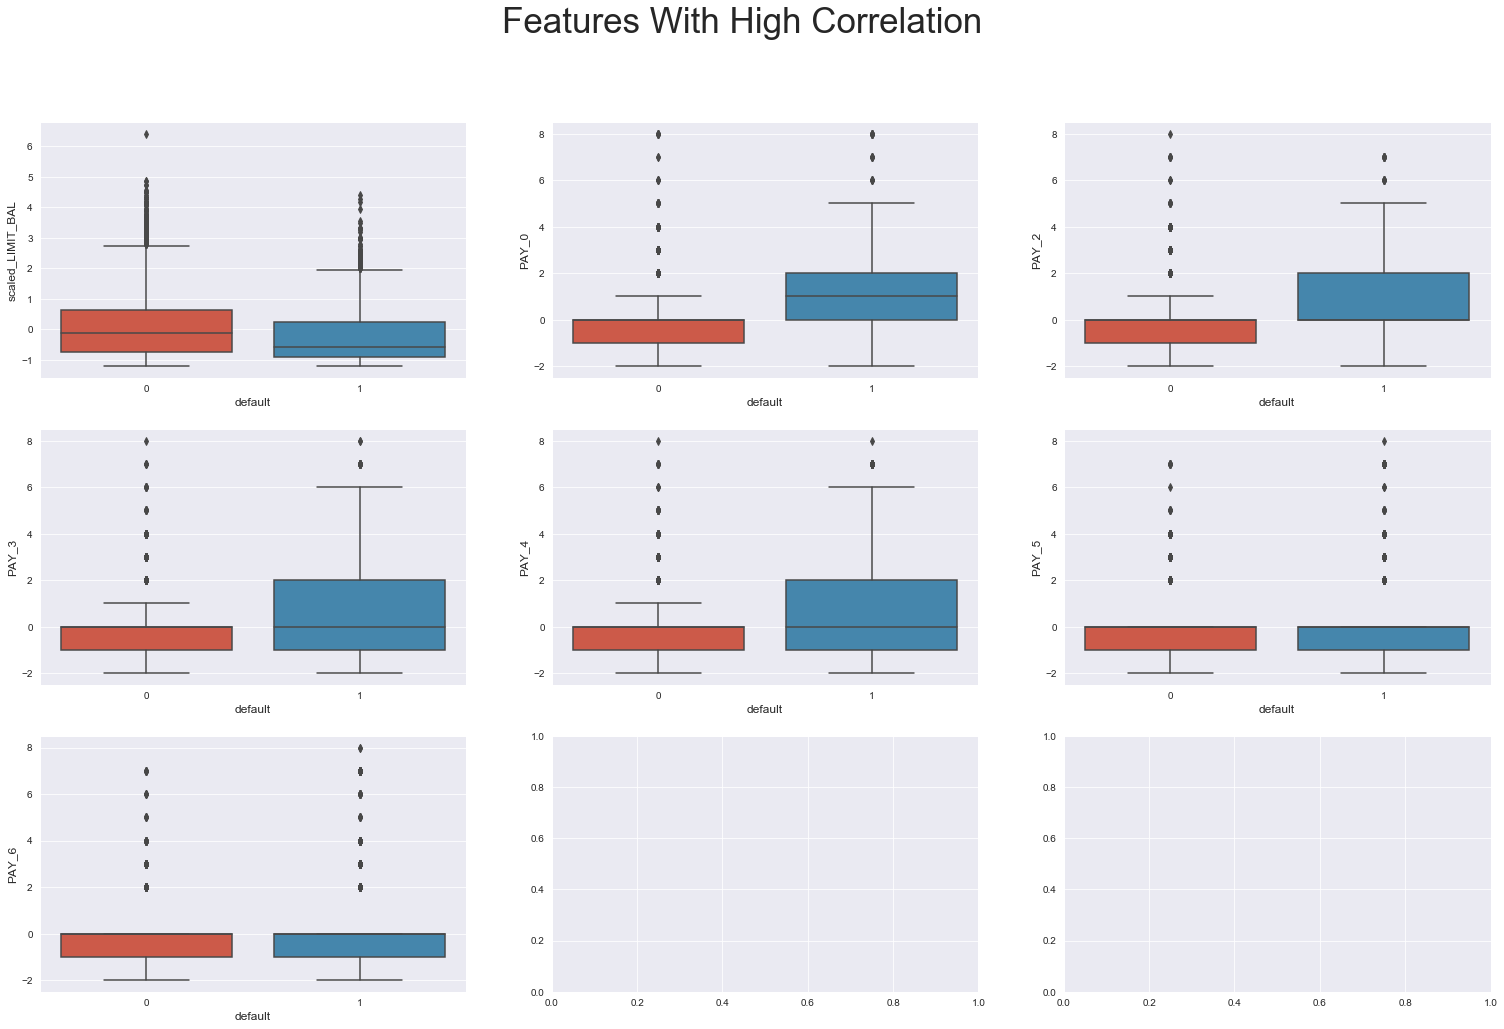

In [15]:
#visualizing the features w high negative and positive correlation
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(26,16))
f.suptitle('Features With High Correlation', size=35)
sns.boxplot(x="default", y="scaled_LIMIT_BAL", data=df, ax=axes[0,0])
sns.boxplot(x="default", y="PAY_0", data=df, ax=axes[0,1])
sns.boxplot(x="default", y="PAY_2", data=df, ax=axes[0,2])
sns.boxplot(x="default", y="PAY_3", data=df, ax=axes[1,0])
sns.boxplot(x="default", y="PAY_4", data=df, ax=axes[1,1])
sns.boxplot(x="default", y="PAY_5", data=df, ax=axes[1,2])
sns.boxplot(x="default", y="PAY_6", data=df, ax=axes[2,0])


**Classification Algorithms**

In [16]:
y = df['default']

X = list(df.columns)
X = list(filter(lambda a: a!='ID' and a!='default', X))
X = df[X]

# y = df['default payment next month']
# X = df[[col for col in df.columns if col!="default payment next month"]]

In [17]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [18]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the original split for later use in XGB pkg
X_train_XGB = X_train
X_test_XGB = X_test
y_train_XGB = y_train 
y_test_XGB = y_test


In [19]:
# Prepare data for SKlearn pkg
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [20]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (24000, 23) (6000, 23) 

Y_shapes:
 Y_train: Y_validation:
 (24000,) (6000,)


### Section II - Quick comparison of differnt algos w default settings, and pick algos to develop completely

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier(max_depth=5, max_leaf_nodes=20)))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.720967 (0.009981)
LDA: 0.716254 (0.009961)
KNN: 0.700986 (0.013723)
CART: 0.612846 (0.015586)
SVM: 0.719328 (0.017254)
XGB: 0.779363 (0.010206)
RF: 0.772469 (0.011765)


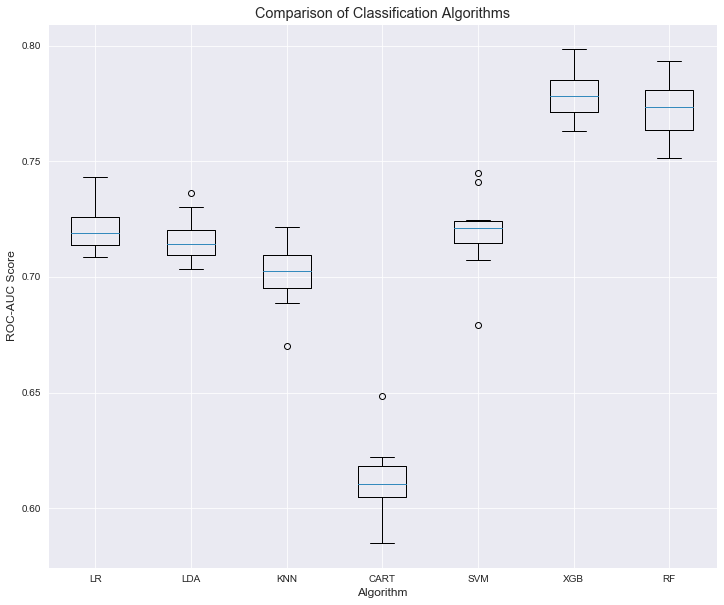

In [23]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [24]:
# visualizing RF
model = RandomForestClassifier(n_estimators=10, max_depth = 3, max_leaf_nodes = 10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

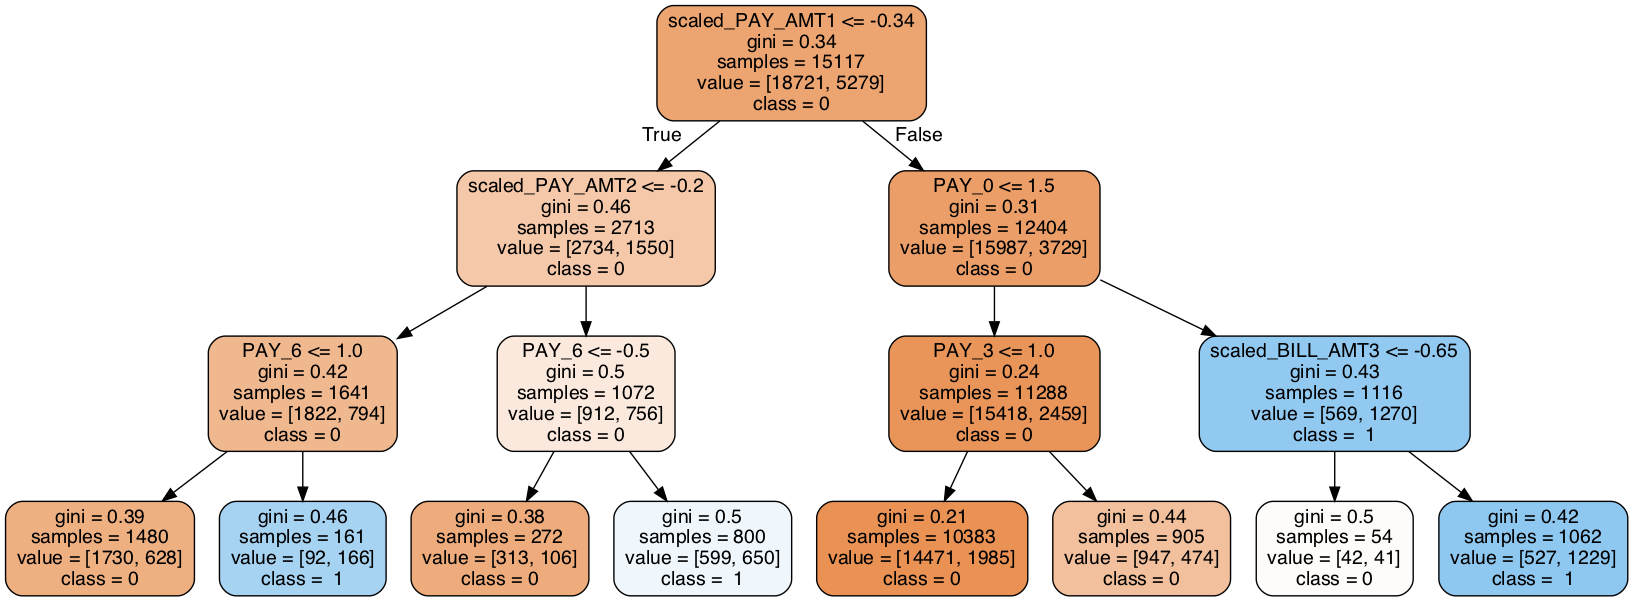

In [25]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Section III - Build XGB (top performer)

In [26]:
# Dummy up categorical vars - Education, Marriage
# No need to dummy up SEX since it's already binary
def process_categorical_features(df):
    dummies_education = pd.get_dummies(df.EDUCATION, prefix="EDUCATION", drop_first=True)
    dummies_marriage = pd.get_dummies(df.MARRIAGE, prefix="MARRIAGE", drop_first=True)
    df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
    return pd.concat([df, dummies_education, dummies_marriage], axis=1)
df = process_categorical_features(df)
df.head()

,ID,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,...,scaled_PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,2,24,2,2,-1,-1,-2,-2,1,...,-0.293,0,1,0,0,0,0,1,0,0
1,2,2,26,-1,2,0,0,0,2,1,...,-0.181,0,1,0,0,0,0,0,1,0
2,3,2,34,0,0,0,0,0,0,0,...,-0.012,0,1,0,0,0,0,0,1,0
3,4,2,37,0,0,0,0,0,0,0,...,-0.237,0,1,0,0,0,0,1,0,0
4,5,1,57,-1,0,-1,0,0,0,0,...,-0.255,0,1,0,0,0,0,1,0,0


In [27]:
# Re-split dataset to train and test, to align with random_state

# Rename XGBClassifier
import xgboost as xgb

XGB = xgb.sklearn.XGBClassifier(nthread=-1, seed=42)
XGB.fit(X_train_XGB, y_train_XGB)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

In [28]:
# Prediction on Test set
predictions = XGB.predict(X_test)
pd.DataFrame(predictions, index=X_test.index, columns=['Predicted default']).head()

,Predicted default
2308,0
22404,0
23397,0
25058,0
2664,0


In [29]:
# Description of Model Specs
print("Number of boosting trees: {}".format(XGB.n_estimators))
print("Max depth of trees: {}".format(XGB.max_depth))
print("Objective function: {}".format(XGB.objective))

Number of boosting trees: 100
Max depth of trees: 3
Objective function: binary:logistic


In [30]:
# Model performance metrics
print("Model Accuray: {:.2f}%".format(100*XGB.score(X_test, y_test)))

Model Accuray: 82.07%


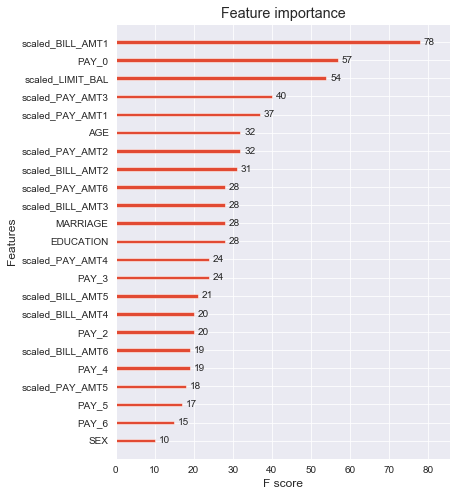

In [31]:
# Plot feature importance
plt.figure(figsize=(6,8))
xgb.plot_importance(XGB, ax=plt.gca())

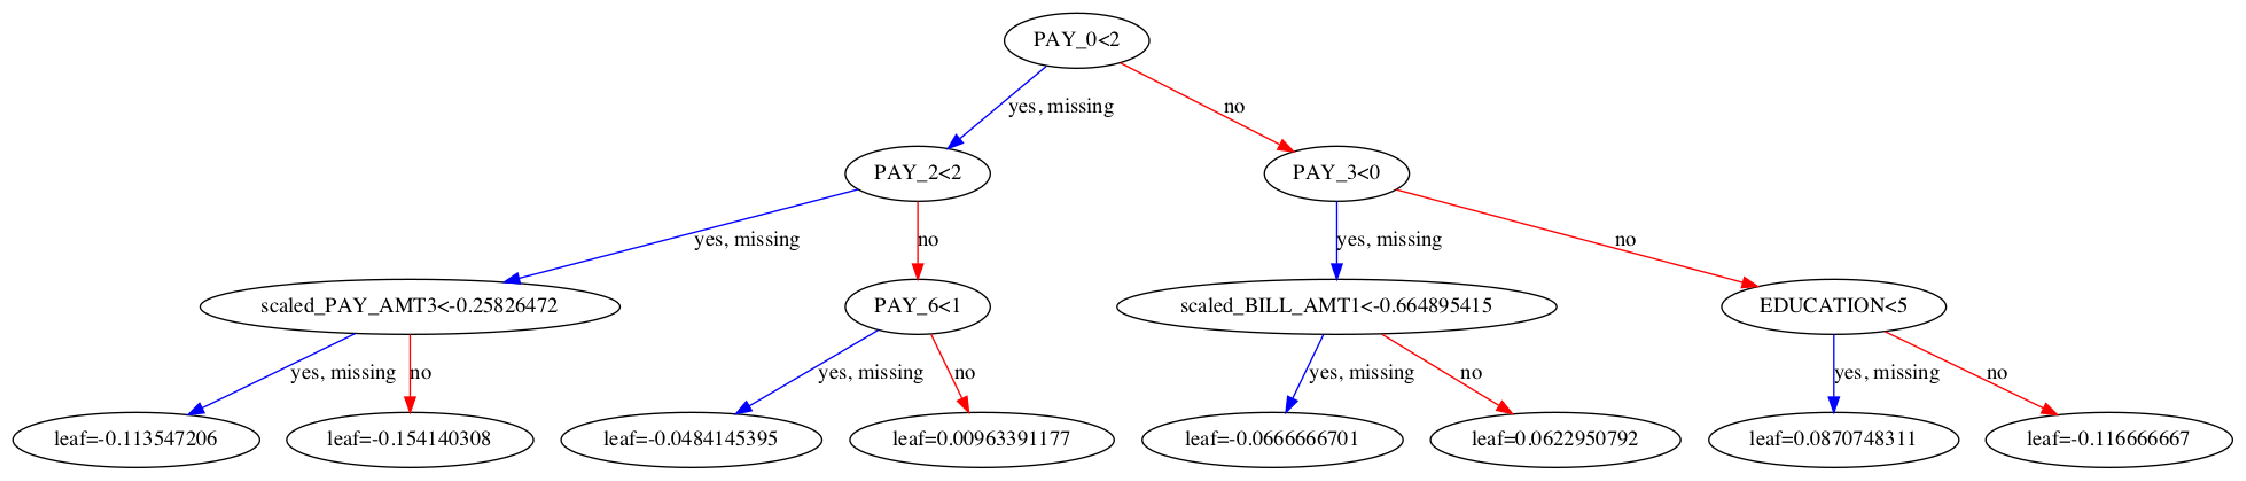

In [32]:
# Visualize one tree in XGB

plt.figure(figsize=(40,40))
xgb.plot_tree(XGB, ax=plt.gca())

### Section IV - Build a Decision Tree Model (Practice Grid Search)

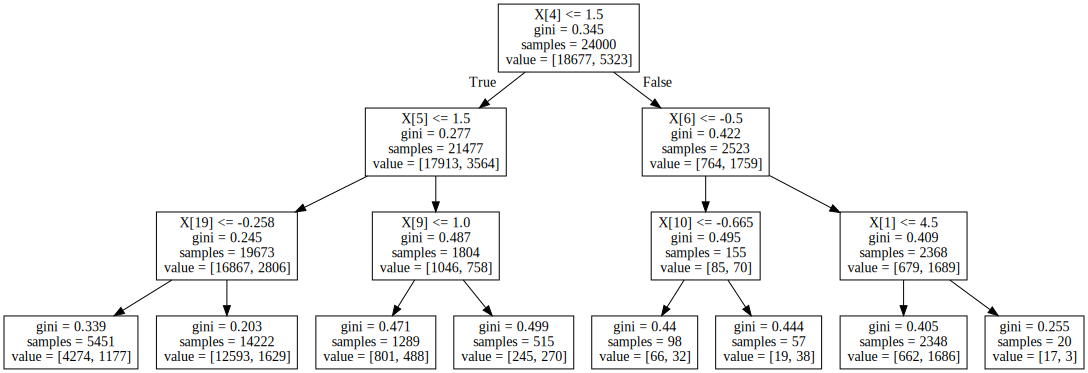

In [33]:
from sklearn import tree
import graphviz

DTree = DecisionTreeClassifier(max_depth = 3, max_leaf_nodes = 10, min_samples_split= 5)
DTree.fit(X_train, y_train)

dot_data = tree.export_graphviz(DTree, out_file = None)
graph = graphviz.Source(dot_data)
graph

In [34]:
y_pred = DTree.predict(X_test)

In [35]:
import itertools 

In [36]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm,  cmap=cmap) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(classes) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cm.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    return plt.show()

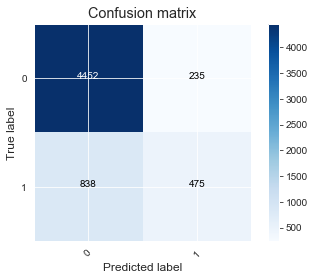

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),set(y_test))

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



compare baseline model, calculate precision and recall. accuracy is low

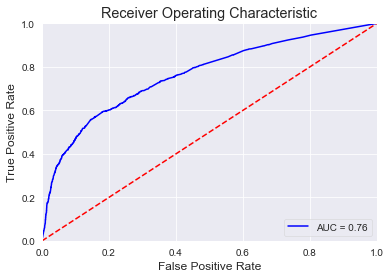

In [39]:
#Plot ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
# Import
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
max_depth_range = list(range(2, 6))
param_grid = dict(max_depth=max_depth_range)

# instantiate the grid
grid = GridSearchCV(DTree, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=10,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='ac

In [41]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.8213333333333334
{'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


### Section V - Logistic Regression

In [42]:
# Import LR just in case, and set SNS format
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [43]:
# Dummy up categorical vars - Education, Marriage
# This step has been done in previous section, pasted below as part of feature engineering
# def process_categorical_features(df):
#     dummies_education = pd.get_dummies(df.EDUCATION, prefix="EDUCATION", drop_first=True)
#     dummies_marriage = pd.get_dummies(df.MARRIAGE, prefix="MARRIAGE", drop_first=True)
#     df.drop(["EDUCATION", "MARRIAGE"], axis=1, inplace=True)
#     return pd.concat([df, dummies_education, dummies_marriage], axis=1)
# df = process_categorical_features(df)
df.head()

,ID,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default,...,scaled_PAY_AMT6,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,2,24,2,2,-1,-1,-2,-2,1,...,-0.293,0,1,0,0,0,0,1,0,0
1,2,2,26,-1,2,0,0,0,2,1,...,-0.181,0,1,0,0,0,0,0,1,0
2,3,2,34,0,0,0,0,0,0,0,...,-0.012,0,1,0,0,0,0,0,1,0
3,4,2,37,0,0,0,0,0,0,0,...,-0.237,0,1,0,0,0,0,1,0,0
4,5,1,57,-1,0,-1,0,0,0,0,...,-0.255,0,1,0,0,0,0,1,0,0


Text(0.5, 1, 'Heatmap of Correlation')

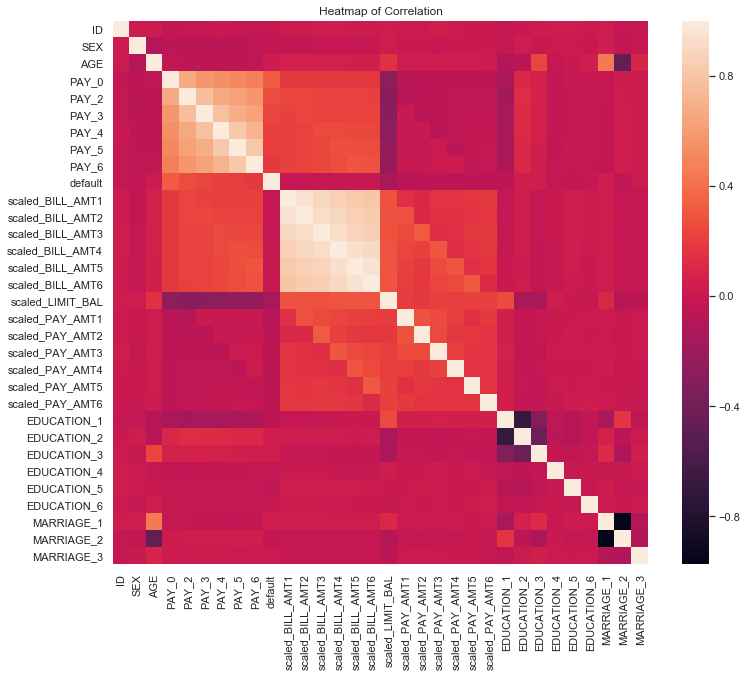

In [44]:
pd.set_option('precision', 2)
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [45]:
# Remove vars with high multicolinearity

X = list(X_train_XGB.columns)
X = list(filter(lambda a: a!='BILL_AMT2'and a!='BILL_AMT3'and a!='BILL_AMT4'
                and a!='BILL_AMT5'and a!='BILL_AMT6'and a!='PAY_2'and a!='PAY_3'
                and a!='PAY_4'and a!='PAY_5'and a!='PAY_6', X))
X_train_lg = X_train_XGB[X]
# the train dataset is a subset of the one used in XGB by removing feature with ml


X = list(X_test_XGB.columns)
X = list(filter(lambda a: a!='BILL_AMT2'and a!='BILL_AMT3'and a!='BILL_AMT4'
                and a!='BILL_AMT5'and a!='BILL_AMT6'and a!='PAY_2'and a!='PAY_3'
                and a!='PAY_4'and a!='PAY_5'and a!='PAY_6', X))
X_test_lg = X_test_XGB[X]

# the test dataset is a subset of the one used in XGB by removing feature with ml

X_train_lg = X_train_lg.values
X_test_lg = X_test_lg.values

y_train_lg = y_train
y_test_lg = y_test

In [46]:
logreg = LogisticRegression(penalty ='l1',fit_intercept=True, random_state=30, max_iter=100)


logreg.fit(X_train_lg, y_train_lg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=30, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression classifier on test set: 0.81
[[4547  140]
 [ 999  314]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



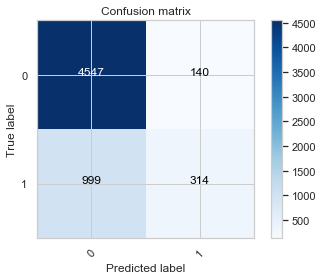

In [49]:
# Overall Accuracy

y_pred_lg = logreg.predict(X_test_lg)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_lg, y_test_lg)))


# Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_lg, y_pred_lg)
print(confusion_matrix)

# Confusion Matrix

from sklearn.metrics import classification_report
print(classification_report(y_test_lg, y_pred_lg))

plot_confusion_matrix(confusion_matrix,set(y_test_lg),
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)


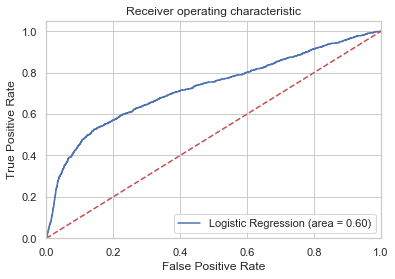

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_lg, logreg.predict(X_test_lg))
fpr, tpr, thresholds = roc_curve(y_test_lg, logreg.predict_proba(X_test_lg)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()